In [42]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from unidecode import unidecode
import warnings
pd.set_option('display.max_columns',30)

In [43]:
giay_nam = pd.read_csv('D:\TIKI\giay-nam.csv')
giay_nu = pd.read_csv('D:\TIKI\giay-nu.csv')
giay_nam_image_count = pd.read_csv('D:\TIKI\giay-nam-images.csv')
giay_nu_image_count = pd.read_csv('D:\TIKI\giay-nu-images.csv')
giay_nam = giay_nam.drop(columns=['Unnamed: 0'])
giay_nu = giay_nu.drop(columns=['Unnamed: 0'])

In [44]:
giay_nam_id = pd.read_csv('giay-nam-id.csv',usecols=['product_id','category_name'])
giay_nu_id = pd.read_csv('giay-nu-id.csv',usecols=['product_id','category_name'])
giay_nam_id = giay_nam_id.drop_duplicates()
giay_nu_id = giay_nu_id.drop_duplicates()

In [45]:
giay_nam = giay_nam.merge(giay_nam_id,left_on='id',right_on='product_id',how='left')
giay_nu = giay_nu.merge(giay_nu_id,left_on='id',right_on='product_id',how='left')
giay_nam = giay_nam.drop(columns=['product_id'])
giay_nu = giay_nu.drop(columns=['product_id'])

In [46]:
#I add tag 'man' / 'woman' into category_name to ensure that there are no identical category name in both table when concatenated later
#giay_nam['category_name'] = 'MAN-'+giay_nam['category_name']
giay_nam['root_category'] = 'giay-nam'

#giay_nu['category_name'] = 'WOMAN-'+giay_nu['category_name']
giay_nu['root_category'] = 'giay-nu'

In [47]:
last_update = '2023-06-18 18:00:00'
concat_df = pd.concat([giay_nam,giay_nu])
concat_df['last_update'] = pd.to_datetime(last_update)
concat_df = concat_df.reset_index()
concat_df = concat_df.drop(columns='index')
concat_df = concat_df.drop_duplicates(subset=['id'])

In [48]:
#Merge new crawl image count into concat_df
image_df = pd.concat([giay_nam_image_count,giay_nu_image_count])
image_df = image_df[['id','max_image']].drop_duplicates()

concat_df = concat_df.merge(image_df,on='id',how='left')

In [49]:
concat_df.sample(3)

,id,sku,name,discription,original_price,list_price,price,alltime_quantity_sold,quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,rating_average,favourite_count,ASA_cashback,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update,max_image
1034,242484907,5012136303298,Dép nam 2 quai da bò TIẾN CÔNG lót da đế chất ...,DÉP NAM 2 QUAI DA BÒ TIẾN CÔNG MÀU ĐENTHÔNG TI...,319000,319000,249000,{},NaN,available,dropship,Tien Cong,10384,Dép nam quai ngang,0,0.0,0,"Thưởng 1,25 ASA (≈ 267đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",TC-FASHION,106,NaN,dep-nam-quai-ngang,giay-nam,2023-06-18 18:00:00,7
24847,41538891,4443489790219,Giày sandal nữ NY057,Là một sản phẩm được thiết kế vừa trẻ trung ti...,420000,420000,420000,{},NaN,available,dropship,OEM,2,Root,0,0.0,0,"Thưởng 2,10 ASA (≈ 449đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",SH0P NHƯ Ý,1308,NaN,giay-sandals-de-bang,giay-nu,2023-06-18 18:00:00,1
16393,228091807,9551740149858,Dép xỏ ngón nam da bò thật TiTi ĐÔ cao cấp DNA...,Dép xỏ ngón nam da bò thật TiTi ĐÔ cao cấp DNA...,450000,450000,279000,{},NaN,available,dropship,OEM,10383,Dép nam xỏ ngón,0,0.0,0,"Thưởng 40,17 ASA (≈ 8.635đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",TiTi ĐÔ Shop,114,NaN,dep-nam-xo-ngon,giay-nam,2023-06-18 18:00:00,9


## PREPROCESSING DATA

In [50]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42648 entries, 0 to 42647
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     42648 non-null  int64         
 1   sku                    42648 non-null  int64         
 2   name                   42648 non-null  object        
 3   discription            42648 non-null  object        
 4   original_price         42648 non-null  int64         
 5   list_price             42648 non-null  int64         
 6   price                  42648 non-null  int64         
 7   alltime_quantity_sold  42648 non-null  object        
 8   quantity_sold          13295 non-null  float64       
 9   inventory_status       42648 non-null  object        
 10  fulfillment_type       42647 non-null  object        
 11  brand                  42648 non-null  object        
 12  category_id            42648 non-null  int64         
 13  c

In [51]:
concat_df['has_video'] = concat_df['video_url'].notna()
concat_df['alltime_quantity_sold'] = concat_df['alltime_quantity_sold'].replace('{}',0).astype(int)
concat_df['quantity_sold'] = concat_df['quantity_sold'].fillna(0)
concat_df['rating_average'] = concat_df['rating_average']
concat_df['ASA_cashback_transformed'] = concat_df['ASA_cashback'].apply(lambda x: float(x.split()[1].replace(',','.')))
concat_df['vnd_cashback'] = concat_df['ASA_cashback'].apply(lambda x: (x.split()[4]).replace('đ)','').replace('.','')).astype(int)
concat_df['pay_later'] = concat_df['pay_later'].notna()
concat_df['brand'] = concat_df['brand'].replace('\tOEM','OEM')
concat_df['estimated_revenue'] = concat_df['price']*concat_df['alltime_quantity_sold']
concat_df['discount_rate'] = (concat_df['list_price'] - concat_df['price']) / concat_df['list_price']

In [52]:
#In my random investigation of item name, i found out that there are a number of products which are actually not shoes but classified
# in shoes category(both men's and women's)
keyword = ['giay', 'dep', 'boot', 'boots', 'guoc','xuc', 'suc', 'sandal','sandals', 'got', 'xang dan',
           'sandan', 'chai', 've sinh', 'dung', 'bot', 'sneaker', 'sneakers', 'ung','tong','crocs',
           'marten']
ascii_keywords = [unidecode(word) for word in keyword]

concat_df['name_normal'] = concat_df['name'].str.lower().apply(unidecode)
concat_df['discription_normal'] = concat_df['discription'].str.lower().apply(unidecode)

concat_df = concat_df.loc[((concat_df['name_normal'].str.contains('|'.join(ascii_keywords))) | (concat_df['discription_normal'].str.contains('|'.join(ascii_keywords))))]

In [53]:
concat_df.head(2)

,id,sku,name,discription,original_price,list_price,price,alltime_quantity_sold,quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,...,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update,max_image,has_video,ASA_cashback_transformed,vnd_cashback,estimated_revenue,discount_rate,name_normal,discription_normal
0,103682599,7076861254597,"D4 Dép Tổ Ong Đi Mưa, Đi Trong Nhà Nam Nữ Chất...","Dép Tổ Ong Đi Mưa, Đi Trong Nhà Nam Nữ ...",9900,9900,9900,95,95.0,available,dropship,OEM,2,Root,7,...,False,Rumyh Fashion Style,743,NaN,dep-nam-quai-ngang,giay-nam,2023-06-18 18:00:00,4,False,1.43,306,940500,0.0,"d4 dep to ong di mua, di trong nha nam nu chat...","dep to ong di mua, di trong nha nam nu ..."
1,176818958,6576642454934,DÉP TỔ ONG ĐEN NHỰA CAO SU DẺO LOẠI ĐẸP ĐỦ SIZ...,LƯU Ý : KHÁCH MUA TỪ 5 ĐÔI TRỞ LÊN SHOP...,10000,10000,10000,17,17.0,available,dropship,OEM,2,Root,0,...,False,Tổng kho đồ gia dụng QL,419,NaN,dep-nam-quai-ngang,giay-nam,2023-06-18 18:00:00,4,False,0.05,10,170000,0.0,dep to ong den nhua cao su deo loai dep du siz...,luu y : khach mua tu 5 doi tro len shop...


the results has filtered out >200 id not relevant. Mostly socks, shirts, etc.

# check duplicate columns

In [54]:
#check 'alltime_quantity_sold' vs 'quantity_sold'
print(concat_df.loc[concat_df['alltime_quantity_sold'].astype(float) != concat_df['quantity_sold']])

#check 'original_price' vs 'list_price'
print(concat_df.loc[concat_df['list_price'] != concat_df['original_price']])

Empty DataFrame
Columns: [id, sku, name, discription, original_price, list_price, price, alltime_quantity_sold, quantity_sold, inventory_status, fulfillment_type, brand, category_id, category, review_count, rating_average, favourite_count, ASA_cashback, pay_later, current_seller, date_created, video_url, category_name, root_category, last_update, max_image, has_video, ASA_cashback_transformed, vnd_cashback, estimated_revenue, discount_rate, name_normal, discription_normal]
Index: []

[0 rows x 33 columns]
Empty DataFrame
Columns: [id, sku, name, discription, original_price, list_price, price, alltime_quantity_sold, quantity_sold, inventory_status, fulfillment_type, brand, category_id, category, review_count, rating_average, favourite_count, ASA_cashback, pay_later, current_seller, date_created, video_url, category_name, root_category, last_update, max_image, has_video, ASA_cashback_transformed, vnd_cashback, estimated_revenue, discount_rate, name_normal, discription_normal]
Index: []



In [55]:
concat_df = concat_df.drop(columns=['quantity_sold','original_price'])

## DATA SUMMARY 

In [56]:
concat_df.sample(1)

,id,sku,name,discription,list_price,price,alltime_quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,rating_average,favourite_count,...,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update,max_image,has_video,ASA_cashback_transformed,vnd_cashback,estimated_revenue,discount_rate,name_normal,discription_normal
41508,262754759,4225600186506,Giày mọi nữ đế bệt HÀ NAM da bò mềm mại cao c...,Giày mọi nữ đế bệt HÀ NAM da bò mềm mại cao cấ...,450000,279000,0,available,dropship,OEM,49586,Giày lười mũi vuông,0,0.0,0,...,True,Hà Nam Giày,12,NaN,giay-luoi-nu,giay-nu,2023-06-18 18:00:00,8,False,40.17,8555,0,0.38,giay moi nu de bet ha nam da bo mem mai cao c...,giay moi nu de bet ha nam da bo mem mai cao ca...


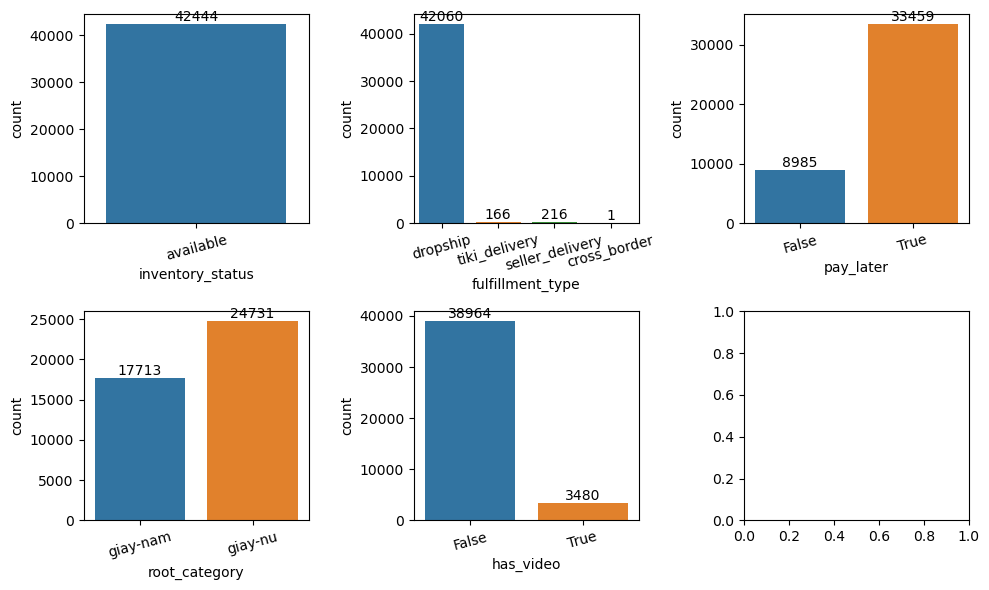

In [57]:
cat_cols = ['inventory_status', 'fulfillment_type', 'pay_later', 'root_category', 'has_video']
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

for col, ax in zip(cat_cols, axes.ravel()):
    sns.countplot(data=concat_df, x=col, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()

- 'inventory_status': there is only 1 value 'available' -> we can drop this column
- 'fulfillment_type': dropship is the dominant fulfillment type in these category. Dropship means the sellers send products to TIKI then TIKI takes care of delivery. TIKI_delivery means the sellers give products priorly to TIKI warehouse (consignment selling) then TIKI takes care of all afterward delivery. seller_delivery means the sellers send goods directly to customers themselves. Cross_border means selling overseas
- 'Pay_later': It is surpring that low-price, common products like shoes having pay_later policy available. I think that this is an 'add-on service' only and it does not have any usability here as a role of customers.
- 'Root-category': Women's shoes have more products listed on TIKI in comparison with men's. ALso, sub-categories inside womens'shoes are also more than men's footwears.
- 'has_video': This feature indicates whether or not the sellers have short_clips on product's postings

In [58]:
px.histogram(concat_df,x='discount_rate',nbins=20,marginal='rug')

In [59]:
px.histogram(concat_df,x='ASA_cashback_transformed',nbins=20,marginal='rug')

In [60]:
top_product_count_sellers = concat_df['current_seller'].value_counts().nlargest(15)
fig = px.bar(top_product_count_sellers, x=top_product_count_sellers.index, y=top_product_count_sellers.values)
fig.update_layout(title='Top sellers with most count products (sellers take priority in buy-box)')

- This is the top sellers that win the most buy-box. In TIKI showing items'mechanism, many sellers can list the same item with the same product ID. The seller offers a product better will win the buy-box and takes the advantage of selling that identical product.
- In this analysis, we can see that TLG GOLD / Đồ Da Thành Long TLG are two stores with the same company
Giày Chất Store / Chất Store 247 is the same.

In [61]:
top_revenue_sellers = concat_df.groupby('current_seller')['estimated_revenue'].sum().nlargest(15)

fig = px.bar(top_revenue_sellers, x=top_revenue_sellers.index, y='estimated_revenue')
fig.update_layout(title='Top Sellers by Estimated Revenue')
fig.show()


- Although the top sellers such as TLG GOLD, Chất Store have the most products listed, they are not in top revenue sellers.

- 1st rank Shoes BIGBEN: this store sells leather shoes for men and women with | price range 250k - 400k
- 2nd rank WearVN: this seller is official distributor of CONVERSE footwears | price range from over 1.2m
- 3rd rank ZAVAS Flagship Store: this is local brand with main products are fashion sneakers | price range from 300k - 500k

# COMPARISON BETWEEN TWO ROOT CATEGORY

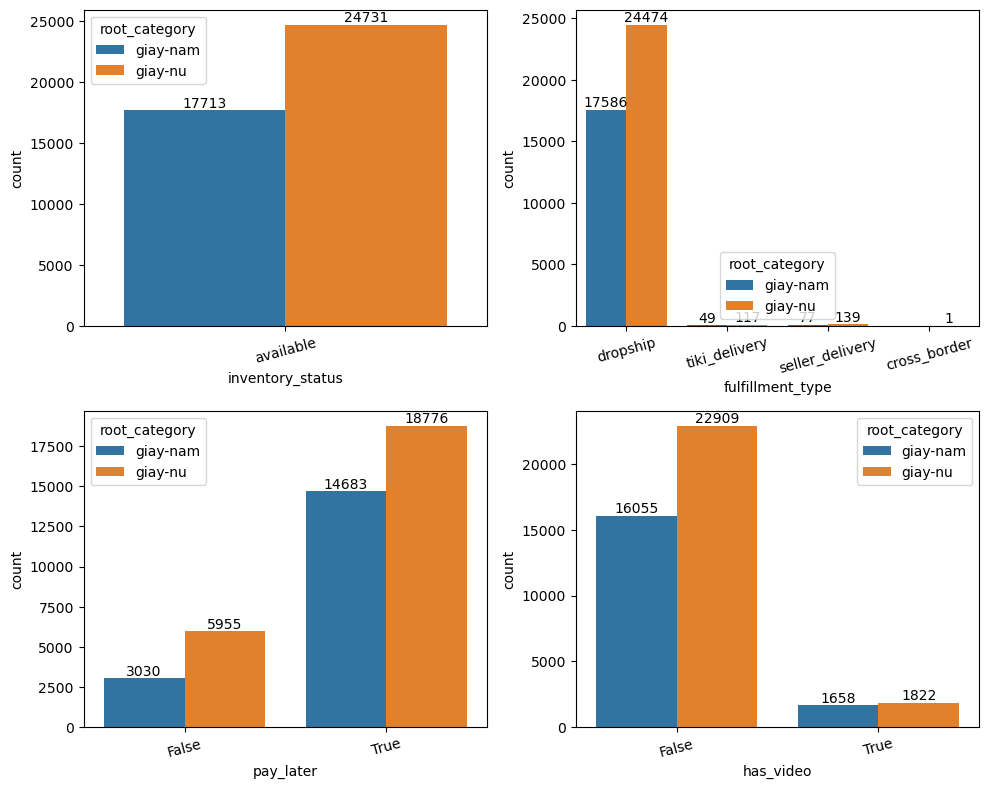

In [62]:
cat_cols = ['inventory_status', 'fulfillment_type', 'pay_later', 'has_video']
fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=2)

for col, ax in zip(cat_cols, axes.ravel()):
    sns.countplot(data=concat_df, x=col, ax=ax, hue='root_category')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()

We can see in the overview chart comparing men's and women' shoes that women's shoes dominates in most counting because the women's product id is much higher than men's id

In [63]:
avg_price_df = concat_df.groupby(['category_name', 'root_category'])['list_price'].mean().reset_index()
avg_price_df = avg_price_df.sort_values(by='list_price',ascending=False)

fig = px.bar(avg_price_df, x='category_name', y='list_price', color='root_category')
fig.update_layout(title='Average Price of Each Category')
fig.show()

By comparing 2 category on PRICE, we can see:
- product of price > 1 are sandals, sport sneakers, men's western shoes (giay tay), men's plastic boots (CROCS shoes)
- MID PRICE RANGE 200k - 500k: other shoes
- PRICE <200k: shoes'accesories, men's slippers

In [64]:
avg_price_df = concat_df.groupby(['category_name', 'root_category'])['alltime_quantity_sold'].sum().reset_index()
avg_price_df = avg_price_df.sort_values(by='alltime_quantity_sold',ascending=False)

fig = px.bar(avg_price_df, x='category_name', y='alltime_quantity_sold', color='root_category')
fig.update_layout(title='Products Sold of Each Category')
fig.show()

IN WOMEN's products:
- most bought items are: Miếng lót giày, slippers, dép quai ngang, sneakers, giày búp bê
IN MEN's products:
- most bought items are: sneakers, dép quai ngang, accesories, miếng lót giày, shoes'cleanings

We can see that: miếng lót giày are heavily bought in both men's & women's categories and this item can be treated as unisex product.
Moreover, 'dép quai ngang' are hot sales in both

In [65]:
grouped_revenue_df = concat_df.groupby(['category_name', 'root_category'])['estimated_revenue'].sum().reset_index()
grouped_revenue_df = grouped_revenue_df.sort_values(by='estimated_revenue',ascending=False)

fig = px.bar(grouped_revenue_df, x='category_name', y='estimated_revenue', color='root_category')
fig.update_layout(title='Estimated Revenue of Each Category')
fig.show()

In this chart, I used esimated revenue by multiplying the 'list_price' & 'quantity sold' (just an estimated revenue because price has the trend to go down overtime, so this revenue is just an under-estimation for all categories)
WE see that:
- Men's SNEAKERS(both high-top and low-top models) sold the most revenue
- 'Dép quai ngang' gets high revenue on both categories

In [66]:
grouped_revenue_df = concat_df.groupby('root_category')['estimated_revenue'].sum().reset_index()
grouped_revenue_df = grouped_revenue_df.sort_values(by='estimated_revenue', ascending=False)

fig = px.bar(grouped_revenue_df, x='root_category', y='estimated_revenue', color='root_category')
fig.update_layout(title='Estimated Revenue of Each Category')
fig.show()

We can see a fun fact here:
Even though the WOMEN's shoes categories have more products posted than MEN's (24,731 women' items > 17713 men's items) nearly 1.4x products id of men's id, the estimated revenue for men's shoes is higher (25.79B men's revenue > 20.14B women's revenue) nearly 1.28x

In [67]:
top_brands = concat_df.groupby('brand')['estimated_revenue'].sum().nlargest(20).reset_index()['brand'].to_list()
concat_df_top_brands = concat_df.loc[concat_df['brand'].isin(top_brands)].groupby(['brand', 'root_category'])['estimated_revenue'].sum().reset_index()

fig = px.bar(concat_df_top_brands, x='brand', y='estimated_revenue', color='root_category', barmode='group')
fig.update_layout(title='Revenue by Brand')
fig.update_layout(xaxis={'categoryorder': 'total descending'})

This chart makes me think of some odd because some top brands such as CONVERSE, BITIS only show mens'collections.
After investigating on TIKI, I found out:
- Converse brand is unisex and they post under MENS' Shoes rather women's shoes.
- Bitis are famous brand but revenue is too low because they are listed under another root category which is 'Thể thao - Dã Ngoại'

The most revenue is from OEM footwears, which is 'no brand'

## Test hypothesis mean: product sold

## MODELS TO PREDICT QUANTITY SOLD

In [68]:
cols = ['price','fulfillment_type','brand','review_count','rating_average','favourite_count','pay_later','date_created',
        'category_name','has_video','vnd_cashback','max_image','discount_rate','alltime_quantity_sold']
model_df = concat_df[cols]

In [69]:
model_df.sample(3)

,price,fulfillment_type,brand,review_count,rating_average,favourite_count,pay_later,date_created,category_name,has_video,vnd_cashback,max_image,discount_rate,alltime_quantity_sold
32465,310400,dropship,ĐỒ DA THÀNH LONG TLG,0,0.0,0,True,704,giay-bup-be-mui-tron,False,9607,6,0.0,0
36838,115000,dropship,OEM,0,0.0,0,True,136,dep-quai-ngang,False,123,5,0.0,0
3535,190000,dropship,OEM,0,0.0,0,True,403,giay-tay-nam-khong-day,False,203,5,0.0,0


In [70]:
model_df[['pay_later','has_video']] = model_df[['pay_later','has_video']].astype(int)

C:\Users\minhp\AppData\Local\Temp\ipykernel_3004\916936741.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
model_df.describe(include='all')

,price,fulfillment_type,brand,review_count,rating_average,favourite_count,pay_later,date_created,category_name,has_video,vnd_cashback,max_image,discount_rate,alltime_quantity_sold
count,4.244400e+04,42443,42444,42444.000000,42444.000000,42444.0,42444.000000,42444.000000,42444,42444.000000,42444.000000,42444.000000,42444.000000,42444.000000
unique,NaN,4,351,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN
top,NaN,dropship,OEM,NaN,NaN,NaN,NaN,NaN,dep-quai-ngang,NaN,NaN,NaN,NaN,NaN
freq,NaN,42060,31934,NaN,NaN,NaN,NaN,NaN,3318,NaN,NaN,NaN,NaN,NaN
mean,3.362682e+05,NaN,NaN,1.641104,0.867894,0.0,0.788309,472.339624,NaN,0.081990,3664.556145,6.086844,0.075990,7.315781
std,4.817977e+05,NaN,NaN,12.527090,1.792374,0.0,0.408512,384.178851,NaN,0.274353,13449.407437,2.933146,0.145838,75.510582
min,9.900000e+02,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,-0.503448,0.000000
25%,1.270000e+05,NaN,NaN,0.000000,0.000000,0.0,1.000000,180.000000,NaN,0.000000,153.000000,4.000000,0.000000,0.000000
50%,2.175500e+05,NaN,NaN,0.000000,0.000000,0.0,1.000000,404.000000,NaN,0.000000,296.000000,6.000000,0.000000,0.000000
75%,3.850000e+05,NaN,NaN,0.000000,0.000000,0.0,1.000000,676.000000,NaN,0.000000,1109.000000,8.000000,0.099733,1.000000


In [72]:
model_df.sample(2)

,price,fulfillment_type,brand,review_count,rating_average,favourite_count,pay_later,date_created,category_name,has_video,vnd_cashback,max_image,discount_rate,alltime_quantity_sold
12412,138000,dropship,OEM,0,0.0,0,1,200,giay-tay-nam-khong-day,0,147,8,0.109677,0
27785,129000,dropship,OEM,0,0.0,0,1,356,giay-cao-got-ho-mui,0,138,1,0.000000,0


In [73]:
#there are total of 351 brands, I will convert product with brand count <10 into OEM because these brands are so minor 
# and can be treated as OEM (there are 206 brands to be converted into OEM, 145 brands left valid)

brand_counts = concat_df['brand'].value_counts()
brands_less_than_10 = brand_counts[brand_counts < 10].index.tolist()

model_df['brand'] = model_df['brand'].apply(lambda x: 'OEM' if x in brands_less_than_10 else x)

C:\Users\minhp\AppData\Local\Temp\ipykernel_3004\4179707005.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
#I transform identical categories existed in both parent category into one.
#This transform based on my view of product type for later Machine learning task. 
#The goal is to reduce the number of values and try to group it together

def category_mapping(row):
    if row['category_name'] in ['dep-nam-quai-ngang','dep-quai-ngang']:
        return 'Dép Quai Ngang'
    elif row['category_name'] in ['giay-the-thao-nam-co-thap','giay-the-thao-co-thap']:
        return 'Giày thể thao cổ thấp'
    elif row['category_name'] in ['giay-the-thao-nam-co-cao','giay-the-thao-co-cao']:
        return 'Giày thể thao cổ cao'
    elif row['category_name'] in ['dep-nam-di-trong-nha','dep-di-trong-nha']:
        return 'Dép đi trong nhà'   
    elif row['category_name'] in ['dep-nam-xo-ngon','dep-xo-ngon']:
        return 'Dép xỏ ngón'   
    elif row['category_name'] in ['giay-boots-nam','giay-boots-nu']:
        return 'Giày boots'
    elif row['category_name'] in ['dep-nam-di-trong-nha','dep-di-trong-nha']:
        return 'Dép đi trong nhà'
    elif row['category_name'] in ['mieng-lot-giay-nam','mieng-lot-giay']:
        return 'Miếng lót giày'     
    elif row['category_name'] in ['phu-kien-cho-giay-nam','phu-kien-cho-giay','ve-sinh-giay']:
        return 'Phụ kiện giày'
    
    elif row['category_name'] in ['giay-luoi-da-nam','giay-luoi-nhua-nam','giay-luoi-vai-nam','giay-luoi-nu']:
        return 'Giày lười'
    elif row['category_name'] in ['giay-tay-nam-khong-day','giay-tay-nam-co-day']:
        return 'Giày tây nam'
    elif row['category_name'] in ['giay-sandals-nam-quai-cheo','giay-sandals-nam-quai-ngang', 'giay-de-xuong-nu',
                                  'giay-sandals-buoc-day','giay-sandals-chien-binh','giay-sandals-de-bang', 'giay-sandals-xo-ngon']:
        return 'Giày sandals'   
    
    elif row['category_name'] in ['giay-bit-mui-quai-ngang',  'giay-cao-got-ho-mui', 'giay-cao-got-nhon',
                                   'giay-cao-got-quai-sau', 'giay-cao-got-suc']:
        return 'Giày cao gót'  

    elif row['category_name'] in ['giay-bup-be-mui-nhon','giay-bup-be-mui-tron', 'giay-bup-be-mui-vuong']:
        return 'Giày búp bê'   
    else:
        return row['category_name']
    
model_df['category_name'] = model_df.apply(category_mapping,axis=1)
model_df['category_name'].unique()

C:\Users\minhp\AppData\Local\Temp\ipykernel_3004\2648512315.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Dép Quai Ngang', 'Giày lười', 'Giày tây nam',
       'Giày thể thao cổ thấp', 'Dép đi trong nhà', 'Dép xỏ ngón',
       'Giày boots', 'Giày sandals', 'Giày thể thao cổ cao',
       'Phụ kiện giày', 'Giày cao gót', 'Giày búp bê'], dtype=object)